 # 1-İş Problemi (Bussiness Problem)

#### Date:İlgili İşlem Gününün tarhini temsil etmektedir.
#### Open:İlgili İşlem Gününün ait hisse başlangıç fıyatını temsil etmektedir.
#### High:İlgili İşlem Gününün ait en yüksek fiyatı temsil etmektedir.
#### Low: İlgili işlem gününe ait en düşük fiyatı temsil etmektedir.
#### Close:İlgili işlem gününde hisse senedinin kapanış fiyatını temsil etmektedir.
#### Adj Close:İlgili işlem gününe ait hisse senedinin düzeltmiş kapanış fiyatını temsil etmektedir.
#### Volume:İlgili işlem gününe ait işlem hacmi bilgisini temsil etmektedir

# 2-Veriyi Anlamak(Understanding Data)

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import warnings
warnings.filterwarnings("ignore")

import os 
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [4]:
data=pd.read_csv("../input/tesla-stock-data-from-2010-to-2020/TSLA.csv")

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [6]:
def check_df(dataframe,head=5):
    print("#################### Shape #################### ")
    print(dataframe.shape)
    print("#################### Types #################### ")
    print(dataframe.dtypes)
    print("#################### Head #################### ")
    print(dataframe.head(head))
    print("#################### Tail #################### ")
    print(dataframe.dtypes)
    print("#################### NA #################### ")
    print(dataframe.isnull().sum())
    print("#################### Quantiles #################### ")
    print(dataframe.quantile([0,0.5,0.50,0.95,0.99,1]).T)


In [7]:
check_df(data)

#################### Shape #################### 
(2416, 7)
#################### Types #################### 
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
#################### Head #################### 
         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900
#################### Tail #################### 
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
#################### NA 

#### date değişkenini değiştimemiz lazım (we need to change the date variable)

In [8]:
data["Date"]=pd.to_datetime(data["Date"])

In [9]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


# 3-Veriyi Hazırlamak (Preparing the Data)

In [10]:
tesla_data=data[["Date","Close"]]

In [11]:
tesla_data.head()

,Date,Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [12]:
print("Min. Tarih:",tesla_data["Date"].min())
print("Max. Tarih:",tesla_data["Date"].max())

Min. Tarih: 2010-06-29 00:00:00
Max. Tarih: 2020-02-03 00:00:00


In [13]:
tesla_data.index=tesla_data["Date"]

In [14]:
tesla_data

,Date,Close
Date,,
2010-06-29,2010-06-29,23.889999
2010-06-30,2010-06-30,23.830000
2010-07-01,2010-07-01,21.959999
2010-07-02,2010-07-02,19.200001
2010-07-06,2010-07-06,16.110001
...,...,...
2020-01-28,2020-01-28,566.900024
2020-01-29,2020-01-29,580.989990
2020-01-30,2020-01-30,640.809998


In [15]:
tesla_data.drop("Date",axis=1,inplace=True)

In [16]:
tesla_data

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2020-01-28,566.900024
2020-01-29,580.989990
2020-01-30,640.809998


In [17]:
result_data=tesla_data.copy()

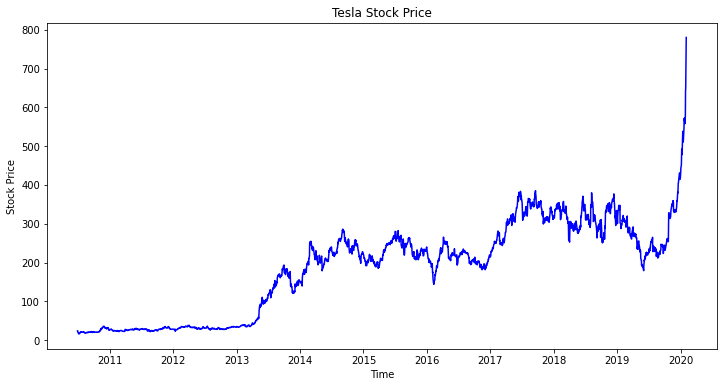

In [18]:
plt.figure(figsize=(12,6))
plt.plot(tesla_data["Close"],color="blue");
plt.ylabel("Stock Price")
plt.title("Tesla Stock Price")
plt.xlabel("Time")
plt.show()

#### 2011 2013 arasında düşüş gözüküyor 2019 sonlarında patlama gozukuyor (Seems to decrease between 2011 and 2013 Looks like a boom in late 2019)

#### numpy arraye çevirelim (convert to numpy array)

In [19]:
tesla_data=tesla_data.values

In [20]:
tesla_data[0:5]

array([[23.889999],
       [23.83    ],
       [21.959999],
       [19.200001],
       [16.110001]])

#### sinir ağı için float 32 tanımlamak lazım (It is necessary to define float 32 for neural network)

In [21]:
tesla_data=tesla_data.astype("float32")

#### Train-Test ayrımını fonksiyon olarak yapalım (Let's make the Train-Test distinction as a function)

In [22]:
def split_data(dataframe,test_size):
    pos=int(round(len(dataframe)*(1-test_size)))
    train=dataframe[:pos]
    test=dataframe[pos:]
    return train,test,pos

In [23]:
train,test,pos=split_data(tesla_data,0.20)

In [24]:
print(train.shape,test.shape)

(1933, 1) (483, 1)


In [25]:
scaler_train=MinMaxScaler(feature_range=(0,1))

In [26]:
train=scaler_train.fit_transform(train)

In [27]:
scaler_test=MinMaxScaler(feature_range=(0,1))

In [28]:
test=scaler_test.fit_transform(test)

In [29]:
train[0:5]

array([[0.02191224],
       [0.02174973],
       [0.01668472],
       [0.0092091 ],
       [0.00083966]], dtype=float32)

In [30]:
test[0:5]

array([[0.25685903],
       [0.24829045],
       [0.25511202],
       [0.24978784],
       [0.2465767 ]], dtype=float32)

In [31]:
def create_features(data,lookback):
    X,Y=[],[]
    for i in range(lookback,len(data)):
        X.append(data[i-lookback:i,0])
        Y.append(data[i,0])
    return np.array(X),np.array(Y)

In [32]:
lookback=20

#### Train Veri Seti 

In [33]:
X_train,y_train=create_features(train,lookback)

#### Test Veri Seti

In [34]:
X_test,y_test=create_features(test,lookback)

In [35]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1913, 20) (1913,) (463, 20) (463,)


In [36]:
X_train[0:5]

array([[0.02191224, 0.02174973, 0.01668472, 0.0092091 , 0.00083966,
        0.        , 0.00449621, 0.00433369, 0.0033857 , 0.00633803,
        0.01094258, 0.011078  , 0.01310942, 0.0165493 , 0.01218851,
        0.01197183, 0.01408451, 0.01486999, 0.01394908, 0.01286566],
       [0.02174973, 0.01668472, 0.0092091 , 0.00083966, 0.        ,
        0.00449621, 0.00433369, 0.0033857 , 0.00633803, 0.01094258,
        0.011078  , 0.01310942, 0.0165493 , 0.01218851, 0.01197183,
        0.01408451, 0.01486999, 0.01394908, 0.01286566, 0.01332611],
       [0.01668472, 0.0092091 , 0.00083966, 0.        , 0.00449621,
        0.00433369, 0.0033857 , 0.00633803, 0.01094258, 0.011078  ,
        0.01310942, 0.0165493 , 0.01218851, 0.01197183, 0.01408451,
        0.01486999, 0.01394908, 0.01286566, 0.01332611, 0.01232395],
       [0.0092091 , 0.00083966, 0.        , 0.00449621, 0.00433369,
        0.0033857 , 0.00633803, 0.01094258, 0.011078  , 0.01310942,
        0.0165493 , 0.01218851, 0.01197183, 0

#### toplamda 20 features burada var yani ilgili tarihten 20 gün önceki günü veri setine eklemiş olduk (There are 20 features in total here, so we added the day 20 days before the relevant date to the data set.)

In [37]:
y_test[0:5]

array([0.14734703, 0.1796416 , 0.21088794, 0.20020628, 0.18416718],
      dtype=float32)

#### hisse senedi kapanış fiyatları var (stock closing prices)

In [38]:
X_train=np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))

In [39]:
X_test=np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

In [40]:
y_train=y_train.reshape(-1,1)

In [41]:
y_test=y_test.reshape(-1,1)

In [42]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1913, 1, 20) (1913, 1) (463, 1, 20) (463, 1)


# 4- Modelleme (Modeling)

In [43]:
model=Sequential()
model.add(LSTM(units=50,
              activation="relu",
              input_shape=(X_train.shape[1],lookback)))
model.add(Dropout(0.2))
model.add(Dense(1))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                14200     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 14,251
Trainable params: 14,251
Non-trainable params: 0
_________________________________________________________________


#### Optimizasyon ve değerlendirme metrikleri ayarlanması (Setting optimization and evaluation metrics)

In [45]:
model.compile(loss="mean_squared_error",optimizer="adam")

In [46]:
callbacks=[EarlyStopping(monitor="val_loss",patience=3,verbose=1,mode="min"),
          ModelCheckpoint(filepath="mymodel.h5",monitor="val_loss",mode="min",
                         save_best_only=True,save_weights_only=False,verbose=1)]

In [47]:
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    batch_size=20,
                    validation_data=(X_test,y_test),
                    callbacks=callbacks,
                    shuffle=False)

Epoch 1/100
96/96 [==============================] - 2s 6ms/step - loss: 0.0071 - val_loss: 0.0042

Epoch 00001: val_loss improved from inf to 0.00422, saving model to mymodel.h5
Epoch 2/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.0032

Epoch 00002: val_loss improved from 0.00422 to 0.00323, saving model to mymodel.h5
Epoch 3/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0034

Epoch 00003: val_loss did not improve from 0.00323
Epoch 4/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.0032

Epoch 00004: val_loss improved from 0.00323 to 0.00316, saving model to mymodel.h5
Epoch 5/100
96/96 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.0028

Epoch 00005: val_loss improved from 0.00316 to 0.00278, saving model to mymodel.h5
Epoch 6/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0025

Epoch 00006: val_loss

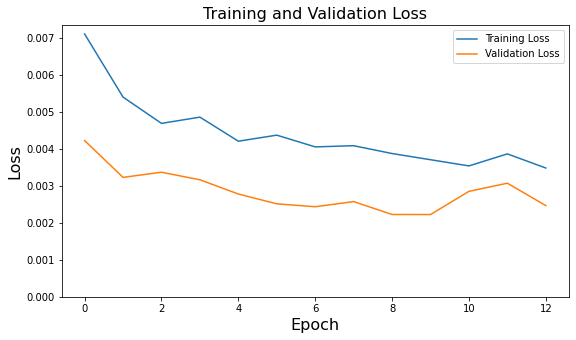

In [48]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Loss",fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title("Training and Validation Loss",fontsize=16)
plt.show()

#### loss ifadesi mean squared eror değeridir yani gerçek değerler ile tahmin edilen değerlerin karelerin ortalaması ifadesidir
#### (The expression loss is the mean squared error value, that is, the mean squared expression of the actual values and the estimated values.)

# 5-Değerlendirme (Evaluation)

In [49]:
loss=model.evaluate(X_test,y_test,batch_size=20)

24/24 [==============================] - 0s 1ms/step - loss: 0.0025


In [50]:
print("\nTest loss:%.1f%%"%(100.0*loss))


Test loss:0.2%


In [51]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [52]:
train_predict=scaler_train.inverse_transform(train_predict)
test_predict=scaler_test.inverse_transform(test_predict)

In [53]:
y_train=scaler_train.inverse_transform(y_train)
y_test=scaler_test.inverse_transform(y_test)

#### train  veri setine RMSE değeri (RMSE value to train dataset)

In [54]:
train_rmse=np.sqrt(mean_squared_error(y_train,train_predict))

In [55]:
test_rmse=np.sqrt(mean_squared_error(y_test,test_predict,))

In [56]:
print(f"Train RMSE:{train_rmse}")
print(f"Test RMSE:{test_rmse}")

Train RMSE:13.116500854492188
Test RMSE:29.849292755126953


#### teslanın gelecek dönemde yapılması görülen hata 32 dolardır (The mistake that tesla will be made in the next period is 32 dollars)

In [57]:
train_prediction_data=result_data[lookback:pos]

In [58]:
train_prediction_data["Predicted"]=train_predict

In [59]:
train_prediction_data.head()

,Close,Predicted
Date,,
2010-07-28,20.719999,34.60014
2010-07-29,20.350000,34.60014
2010-07-30,19.940001,34.60014
2010-08-02,20.920000,34.60014
2010-08-03,21.950001,34.60014


In [60]:
test_prediction_data=result_data[pos+lookback:]

In [61]:
test_prediction_data["Predicted"]=test_predict

In [62]:
test_prediction_data.head()

,Close,Predicted
Date,,
2018-04-03,267.529999,319.470398
2018-04-04,286.940002,316.819580
2018-04-05,305.720001,315.274658
2018-04-06,299.299988,316.532684
2018-04-09,289.660004,319.933472


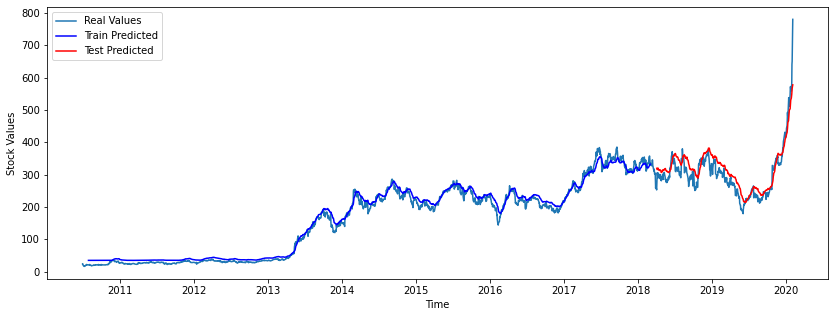

In [63]:
plt.figure(figsize=(14,5))
plt.plot(result_data,label="Real Values")
plt.plot(train_prediction_data["Predicted"],color="blue",label="Train Predicted")
plt.plot(test_prediction_data["Predicted"],color="red",label="Test Predicted")
plt.xlabel("Time")
plt.ylabel("Stock Values")
plt.legend()
plt.show()

### Belirli periyotta tahmınde bulunursak 32 dolar aşağısında yada 32 dolar yukarısında tahmin sonucuna varırız
### (If we forecast in a certain period, we will conclude that we forecast 32 below or 32 above.)

##### TURKCELL GELECEĞİ YAZANLAR